# Homework 6
## Thi Trinh - 20461296

In this homework, you're asked to write the class of **Multivariate** ordinary least square (OLS) regression with Numpy and test its performance with real-world dataset. Please fill the code block cells with your code and comments, run everything (select cell in the menu, and click Run all), save the notebook, and upload it to canvas.

In [2]:
# import the packages
import numpy as np 

## Task 1: Define the class for multivariate linear regression

Define a class named `MyLinearRegression` for the multivariate linear regression machine learning problem. It should contain a method called `fit` to estimate parameters, `predict` to generate predictions, and `score` to evaluate performance with $R^{2}$ value.

**In Task 1, you should write your code with pure Python or Numpy, and are not allowed to use any other packages/functions in Scikit-Learn**

*Hints*:

- For basic structures of this class, you can refer to the single-variable linear regression class defined in lecture notes because they are very similar. You only need to replace the formulas with the mulivariate regression case.


- Please review the mathematical part of lecture notes 10 carefully before writing the code. All the formulas used here are already given in the lecture notes, and you need to pick up the correct formulas to estimate parameters/generate predictions/evaluate performance.


- The most tricky part is about dealing with the intercepts $\beta_{0}$, while we have already done it for you in the `fit` method below. 


- For linear algebra operations in Numpy, you can consult [here](https://numpy.org/doc/stable/reference/routines.linalg.html). You can also review TA's discussion notes on Numpy.

In [5]:
class MyLinearRegression:
    '''
    The multi-variable linear regression estimator 
    '''
        
    def fit(self, X, y):
        '''
        Determine the optimal parameters w, b for the input data x and y
        
        Parameters
        ----------
            x: n-dimension numpy array with shape(n_samples, n_samples), from training data
            y: 1D numpy array with shape(n_sample, ) from training data
            
        Return
        ------
            self: return an instance of self, with new attributes slope w (float) and intercept b (float)
        '''

        ones = np.ones((X.shape[0],1)) # column of ones 
        X_aug = np.concatenate((ones, X), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        X_1 = np.matmul(X_aug.transpose(),X_aug)
        X_2 = np.linalg.inv(X_1)
        X_3 = np.matmul(X_2, X_aug.transpose())
        self.beta = np.matmul(X_3, y)
        
            
    def predict(self,X):
        '''
        Predict the output valutes for the input value x, based on the
        trained parameter
        '''
        ones = np.ones((X.shape[0],1))
        X_new = np.concatenate((ones,X),axis=1)
        return np.matmul(X_new,self.beta)
    
    def score(self, X, y):
        '''
        Calculate the R-square on the dataset with input x and y
        
        Return: float, the R^2 value 
        '''
        
        y_hat = self.predict(X) 
        mse = np.mean((y-y_hat)**2) 
        return 1- (mse / np.var(y)) 

## Task 2: Application to diabetes dataset

- After defining the class, we can test them with the [diabetes dataset](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf), loaded from scikit-learn. We're going to use 10 variables (information about each patient, already mean centered and scaled by the standard deviation) to predict the disease progression (use a number to measure, can be thought as continuous) after one year.

In [3]:
# load the dataset
from sklearn import datasets
db = datasets.load_diabetes()
print(db['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

- Next, we manully split the traning and test datasets. For the basic concepts, please refer to the lecture notes/discussion files.

In [2]:
X = db['data'] # already in Numpy array format
y = db['target'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Please use the class you defined to train the linear regression model on the **training dataset**, and report the $R^{2}$ on **test dataset**.

In [6]:
reg = MyLinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.510395426135144

## Task 3: Comparison with Scikit-Learn

Repeat the linear regression task above (i.e. train the linear regression on the **training dataset**, and report the R^{2} on **test dataset**.) with calling the methods in [sklearn package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Ideally, the results should be the same with task 2.

In [10]:
from sklearn import linear_model
reg_sklearn = linear_model.LinearRegression()
reg_sklearn.fit(X_train, y_train)
reg_sklearn.score(X_test,y_test)

0.510395426135144

In [11]:
reg_sklearn.coef_

array([  32.14567288, -242.82582016,  559.98738213,  407.64166457,
       -718.68703857,  396.63010925,   10.42304776,  171.81177553,
        627.07976426,  -21.62420711])

In [12]:
reg_sklearn.intercept_

150.4339752023493

## Optional Task

1. Create a pandas dataframe of the data and use seaborn to visualize.


2. Can you try the regression module in PyCaret to do the automatic machine learning for this data? You can follow the tutorial [here](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame(np.c_[db['data'], db['target']],columns= db['feature_names']+['target'])
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


<AxesSubplot:>

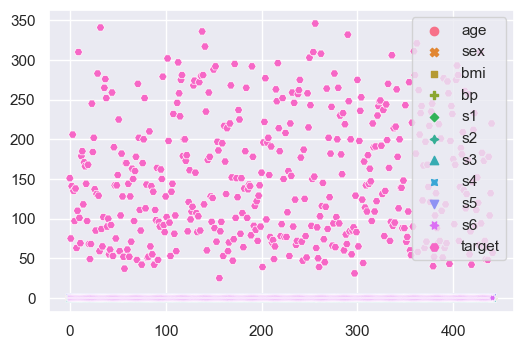

In [8]:
import seaborn as sns
sns.set_theme()
fig, ax = plt.subplots(dpi=100)
sns.scatterplot(data = data)

<AxesSubplot:>

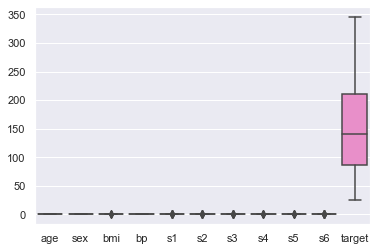

In [9]:
sns.boxplot(data = data)

In [10]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [11]:
data.shape

(442, 11)

In [5]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'target', session_id = 123)

,Description,Value
0,session_id,123
1,Target,target
2,Original Data,"(442, 11)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(309, 10)"


In [13]:
best = compare_models

In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [15]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.1611,2858.4690,53.4647,0.4678,0.4112,0.3781
1,43.1870,2699.3010,51.9548,0.4604,0.4228,0.4399
2,58.8306,5041.0866,71.0006,0.3154,0.5654,0.6247
3,45.5400,3011.9687,54.8814,0.4314,0.3894,0.3530
4,50.2080,3738.4566,61.1429,0.3023,0.4862,0.4926
5,38.9437,2542.4674,50.4229,0.5766,0.3867,0.3515
6,57.9608,4824.2321,69.4567,0.4226,0.4970,0.5034
7,43.1553,3147.2516,56.1004,0.3930,0.4004,0.3558
8,51.7702,3752.6223,61.2587,0.2816,0.4759,0.4869
9,42.7797,2911.0601,53.9542,0.3865,0.4011,0.3997


In [16]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [17]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.0257,2885.5755,53.7176,0.4628,0.4167,0.3656
1,40.0626,2681.0309,51.7787,0.4641,0.4122,0.3962
2,55.5896,4930.9359,70.2206,0.3304,0.5726,0.6182
3,47.2738,3686.2512,60.7145,0.3041,0.3847,0.3174
4,52.0974,3680.9697,60.6710,0.3130,0.4861,0.4885
5,39.5520,2294.1212,47.8970,0.6180,0.3724,0.3491
6,48.4376,4245.0270,65.1539,0.4919,0.4814,0.3934
7,41.9190,3499.0543,59.1528,0.3251,0.4058,0.3147
8,55.4954,4425.8515,66.5271,0.1527,0.5040,0.5060
9,41.7340,2706.9974,52.0288,0.4295,0.3809,0.3450


In [18]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,60.3226,5887.3548,76.7291,-0.0961,0.5719,0.4648
1,60.0323,5172.2258,71.9182,-0.0339,0.5446,0.5635
2,79.7742,10206.7419,101.0284,-0.3860,0.7601,0.8158
3,69.2258,7267.8710,85.2518,-0.3721,0.5922,0.4566
4,76.8065,9095.1290,95.3684,-0.6974,0.6963,0.7608
5,52.5484,4825.5161,69.4659,0.1964,0.5119,0.4544
6,61.6774,6427.8710,80.1740,0.2307,0.5877,0.4718
7,69.0323,7907.0968,88.9219,-0.5251,0.6535,0.5040
8,57.9677,5748.4839,75.8188,-0.1005,0.5838,0.5274
9,67.1000,7892.0333,88.8371,-0.6633,0.5847,0.5257


In [19]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [20]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.0257,2885.5755,53.7176,0.4628,0.4167,0.3656
1,40.0626,2681.0309,51.7787,0.4641,0.4122,0.3962
2,55.5896,4930.9359,70.2206,0.3304,0.5726,0.6182
3,47.2738,3686.2512,60.7145,0.3041,0.3847,0.3174
4,52.0974,3680.9697,60.6710,0.3130,0.4861,0.4885
5,39.5520,2294.1212,47.8970,0.6180,0.3724,0.3491
6,48.4376,4245.0270,65.1539,0.4919,0.4814,0.3934
7,41.9190,3499.0543,59.1528,0.3251,0.4058,0.3147
8,55.4954,4425.8515,66.5271,0.1527,0.5040,0.5060
9,41.7340,2706.9974,52.0288,0.4295,0.3809,0.3450


In [21]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [22]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,55.0645,3979.6129,63.0842,0.2591,0.4658,0.4144
1,41.7742,3365.9194,58.0165,0.3272,0.4448,0.4042
2,66.1452,7668.1048,87.5677,-0.0413,0.6436,0.5804
3,58.4355,5598.5403,74.8234,-0.0570,0.4864,0.3672
4,43.5000,3072.5726,55.4308,0.4266,0.4785,0.3808
5,42.3710,3494.7016,59.1160,0.4180,0.4222,0.3658
6,47.0968,3362.3710,57.9860,0.5976,0.4615,0.4121
7,61.1290,6138.2419,78.3469,-0.1839,0.5391,0.4389
8,54.2903,4263.7097,65.2971,0.1838,0.5400,0.4500
9,46.7333,3449.4167,58.7317,0.2730,0.4187,0.4158


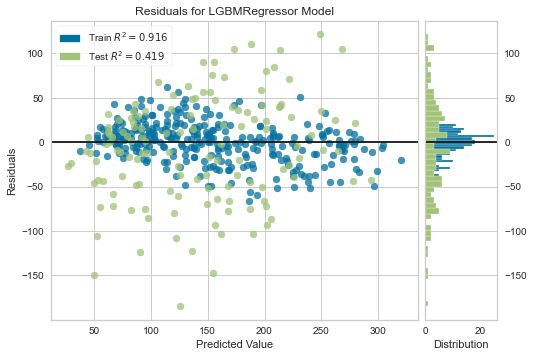

In [23]:
plot_model(tuned_lightgbm)

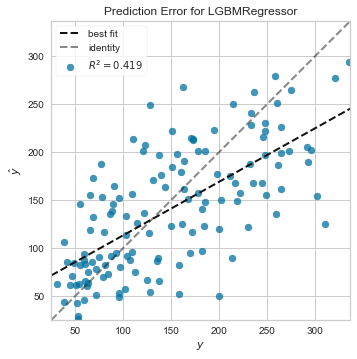

In [24]:
plot_model(tuned_lightgbm, plot = 'error')

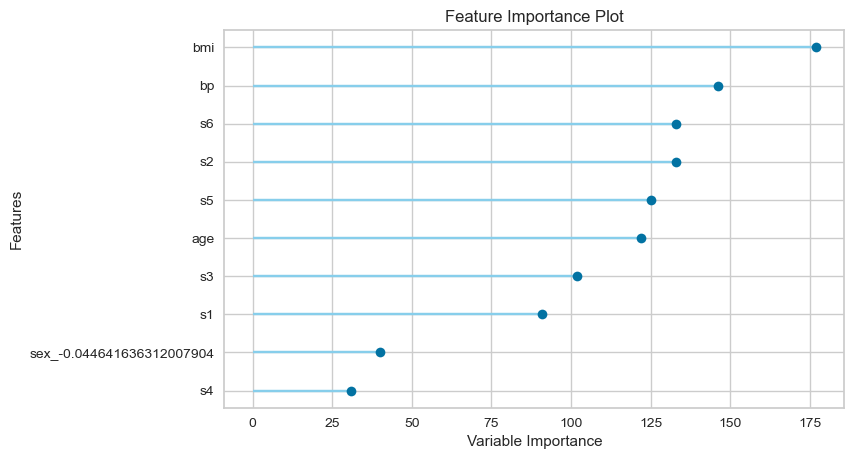

In [25]:
plot_model(tuned_lightgbm, plot='feature')

In [26]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,46.8126,3457.0637,58.7968,0.4187,0.4420,0.3728


In [28]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [29]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16.2979,463.8976,21.5383,0.9220,0.1753,0.1430


In [30]:
unseen_predictions = predict_model(final_lightgbm, data)
unseen_predictions.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,178.320162
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,74.280418
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,140.184963
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,218.644147
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,112.432937


In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.target, unseen_predictions.Label, 'R2')

0.9214